# A4

In [34]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook
import copy
import Network 
import mnist_loader

# Q1: Autoencoder

## (a) Create and Train Network

In [68]:
# Create a network
import importlib
importlib.reload(Network)
net = Network.Network([784,64,3,64,784], type='regression')
# net = Network.Network([784,100,30,3,30,100,784], type='regression')

In [69]:
# Read in 2000 MNIST samples
train, validate, test = mnist_loader.load_data_wrapper()
train_in = np.array(train[0][:1000])
train_class = np.array(train[1][:1000])

In [70]:
# Train the network
progress = net.SGD(train_in, train_in, epochs=1000, lrate=0.1, batch_size=100)

Epoch 0: cost [0, 25.800620656632024]
Epoch 1: cost [1, 25.82696424733099]
Epoch 2: cost [2, 25.79212498212982]
Epoch 3: cost [3, 25.76045267811673]
Epoch 4: cost [4, 25.815033909597986]
Epoch 5: cost [5, 25.704508835935567]
Epoch 6: cost [6, 25.792107356401505]
Epoch 7: cost [7, 25.72230086520882]
Epoch 8: cost [8, 25.75776655455281]
Epoch 9: cost [9, 25.72984824755852]
Epoch 10: cost [10, 25.719899501361585]
Epoch 11: cost [11, 25.73027057386124]
Epoch 12: cost [12, 25.73588872405819]
Epoch 13: cost [13, 25.683712144432324]
Epoch 14: cost [14, 25.798534857850715]
Epoch 15: cost [15, 25.732592300196284]
Epoch 16: cost [16, 25.732321394741025]
Epoch 17: cost [17, 25.74297770557374]
Epoch 18: cost [18, 25.74903341613235]
Epoch 19: cost [19, 25.728278632165026]
Epoch 20: cost [20, 25.73098752810656]
Epoch 21: cost [21, 25.79236768751518]
Epoch 22: cost [22, 25.70375813535126]
Epoch 23: cost [23, 25.700460002704446]
Epoch 24: cost [24, 25.668259838994025]
Epoch 25: cost [25, 25.6914228074

Epoch 204: cost [204, 19.845012305400147]
Epoch 205: cost [205, 19.797400519157303]
Epoch 206: cost [206, 19.686686327972083]
Epoch 207: cost [207, 19.765070126524492]
Epoch 208: cost [208, 19.675094802019235]
Epoch 209: cost [209, 19.670844365072885]
Epoch 210: cost [210, 19.671538963789644]
Epoch 211: cost [211, 19.689778521465342]
Epoch 212: cost [212, 19.672092846934255]
Epoch 213: cost [213, 19.671988964251177]
Epoch 214: cost [214, 19.754757980167152]
Epoch 215: cost [215, 19.642789202585238]
Epoch 216: cost [216, 19.656240799271508]
Epoch 217: cost [217, 19.700390012177795]
Epoch 218: cost [218, 19.723715671682825]
Epoch 219: cost [219, 19.65139340452044]
Epoch 220: cost [220, 19.604469863439043]
Epoch 221: cost [221, 19.598008731798714]
Epoch 222: cost [222, 19.570443060041097]
Epoch 223: cost [223, 19.555951708352442]
Epoch 224: cost [224, 19.571851791997904]
Epoch 225: cost [225, 19.537754200778423]
Epoch 226: cost [226, 19.562411047880897]
Epoch 227: cost [227, 19.6194953054

Epoch 401: cost [401, 17.841639615941087]
Epoch 402: cost [402, 17.82505451071059]
Epoch 403: cost [403, 17.81293361555856]
Epoch 404: cost [404, 17.81860829390326]
Epoch 405: cost [405, 17.853180877809123]
Epoch 406: cost [406, 18.03943403936014]
Epoch 407: cost [407, 17.84582515147845]
Epoch 408: cost [408, 17.788227597909096]
Epoch 409: cost [409, 17.77972859011883]
Epoch 410: cost [410, 17.860500806260436]
Epoch 411: cost [411, 17.831967542693377]
Epoch 412: cost [412, 17.803266455187238]
Epoch 413: cost [413, 17.74713429190329]
Epoch 414: cost [414, 17.7227193107139]
Epoch 415: cost [415, 17.719861253326755]
Epoch 416: cost [416, 17.719139610407122]
Epoch 417: cost [417, 17.735484710710956]
Epoch 418: cost [418, 17.70819900194049]
Epoch 419: cost [419, 17.70041244126022]
Epoch 420: cost [420, 17.690665678555085]
Epoch 421: cost [421, 17.727126845672398]
Epoch 422: cost [422, 17.73548104754197]
Epoch 423: cost [423, 17.6762165957558]
Epoch 424: cost [424, 17.642866095547983]
Epoch 

Epoch 600: cost [600, 16.37391258650039]
Epoch 601: cost [601, 16.43539035295104]
Epoch 602: cost [602, 16.381797813687747]
Epoch 603: cost [603, 16.398501623935804]
Epoch 604: cost [604, 16.34638893177054]
Epoch 605: cost [605, 16.393096128243716]
Epoch 606: cost [606, 16.356706810870683]
Epoch 607: cost [607, 16.42468999821559]
Epoch 608: cost [608, 16.405071466326554]
Epoch 609: cost [609, 16.360509675821355]
Epoch 610: cost [610, 16.314783715825477]
Epoch 611: cost [611, 16.348525519662978]
Epoch 612: cost [612, 16.339975336275526]
Epoch 613: cost [613, 16.361759224585533]
Epoch 614: cost [614, 16.338368997363027]
Epoch 615: cost [615, 16.34836676687599]
Epoch 616: cost [616, 16.297514870737764]
Epoch 617: cost [617, 16.507115781452256]
Epoch 618: cost [618, 16.38688008421646]
Epoch 619: cost [619, 16.275212738900006]
Epoch 620: cost [620, 16.287021724577585]
Epoch 621: cost [621, 16.29239455004203]
Epoch 622: cost [622, 16.289702627096876]
Epoch 623: cost [623, 16.37774283568247]


Epoch 800: cost [800, 15.723526947918351]
Epoch 801: cost [801, 15.74268156948287]
Epoch 802: cost [802, 15.670424149825347]
Epoch 803: cost [803, 15.635604129297805]
Epoch 804: cost [804, 15.656395363780264]
Epoch 805: cost [805, 15.623298812417538]
Epoch 806: cost [806, 15.633161800690406]
Epoch 807: cost [807, 15.691288804560333]
Epoch 808: cost [808, 15.722756438481394]
Epoch 809: cost [809, 15.658453918229595]
Epoch 810: cost [810, 15.722643287217416]
Epoch 811: cost [811, 15.66088032148569]
Epoch 812: cost [812, 15.63794498911345]
Epoch 813: cost [813, 15.70256109480984]
Epoch 814: cost [814, 15.64258579307789]
Epoch 815: cost [815, 15.677493625331975]
Epoch 816: cost [816, 15.597644198815203]
Epoch 817: cost [817, 15.68152865682178]
Epoch 818: cost [818, 15.732262236402534]
Epoch 819: cost [819, 15.633158551142925]
Epoch 820: cost [820, 15.613825109692815]
Epoch 821: cost [821, 15.610927526366371]
Epoch 822: cost [822, 15.692649534383811]
Epoch 823: cost [823, 15.663636773197561

Epoch 999: cost [999, 15.096819054025284]


Save and/or load the network

In [71]:
net.Save('yourNet.net')

In [72]:
net = Network.Network.Load('yourNet.net')

## (b) View Reconstructions

<IPython.core.display.Javascript object>


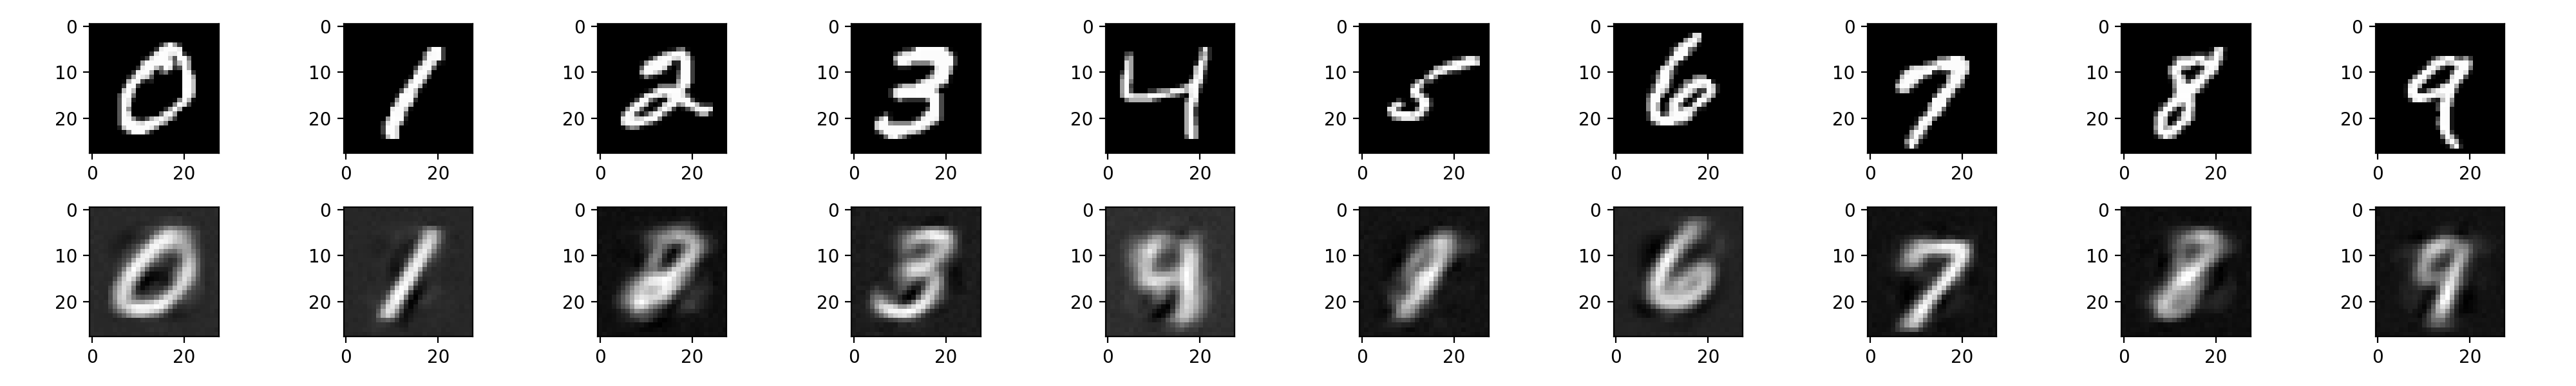

In [73]:
# Dispaly one of each digit class
# Plot both original and reconstruction

row_num = 2
col_num = 10
index = [0 for i in range(10)]
for label_idx, label in enumerate(train_class):
    cat = int(np.where(label == 1.)[0])
    index[cat] = label_idx if index[cat] == 0 else index[cat]
    if all([e != 0 for e in index]):
        break
        
# fig, axes = plt.subplots(row_num,col_num)
# plt.axis('off')

fig, axes = plt.subplots(row_num,col_num,figsize=(20,3))
# plt.axis('off')
for i,idx in enumerate(index):
    axes[0,i].imshow(train_in[idx].reshape(28,28),cmap='gray')
    axes[1,i].imshow(net.FeedForward(train_in[idx]).reshape(28,28),cmap='gray')
#     axes[0,i].get_yaxis().set_visible(False)
#     axes[0,i].get_xaxis().set_visible(False)
#     axes[1,i].get_yaxis().set_visible(False)
#     axes[1,i].get_xaxis().set_visible(False)
    
plt.tight_layout()
plt.show()


## (c) Plot Embeddings

In [74]:
activities = []
for t in train_in:
    net.FeedForward(t)
    activities.append(net.lyr[2].h)
activities = np.array(activities)
# the category, 0 for number 0, ..... 9 for number 9
color_label = np.array([list(np.where(i==1.)[0]) for i in train_class])
# randomly generate 10 color
colors = cm.rainbow(np.linspace(0, 1, 10))

<IPython.core.display.Javascript object>


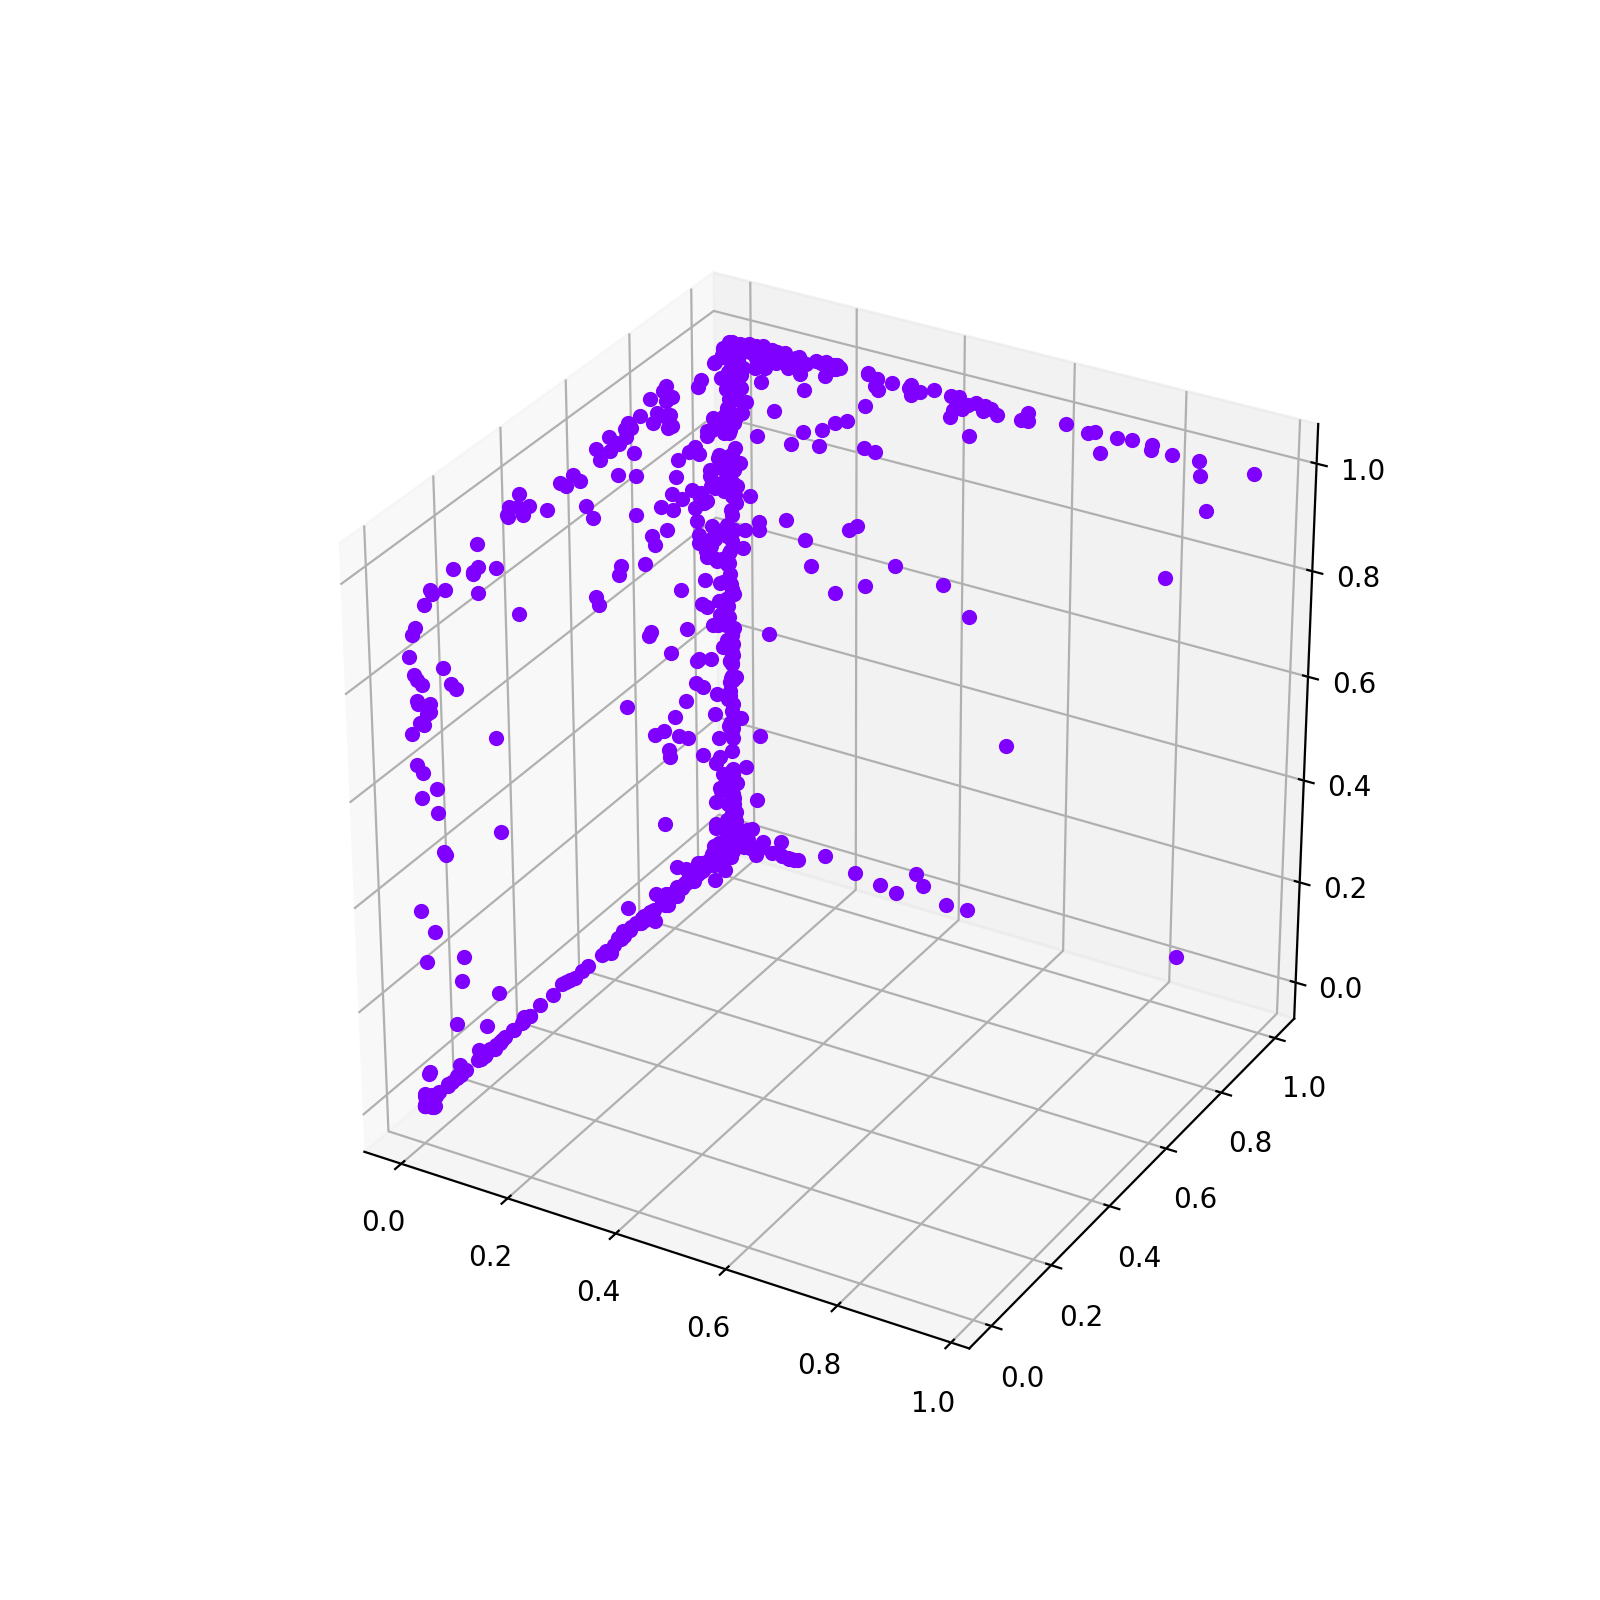

In [75]:
color_label = np.array([list(np.where(i==1.)[0]) for i in train_class])
points = np.hstack([activities,color_label])
# [x,y,z, cat] , cat = [0-9]
fig = plt.figure(3, figsize=[8,8])
fig.clf()
ax = plt.axes(projection='3d')
for point in points:
    ax.scatter3D(point[0], point[1], point[2],color = colors[int(point[3])] )
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z');

In [65]:
# # convert label to colors...
# color_label = np.array([colors[int(i)] for i in color_label])
# # [x,y,z rgb_color]
# act_label = np.hstack([activities,color_label])
# fig = plt.figure(3, figsize=[20,20])
# fig.clf()
# ax = plt.axes(projection='3d')

# for point in act_label:

#     ax.scatter3D(point[0], point[1], point[2],color = np.array(point[:3]) )
# # ax.scatter3D(activities[:,0], activities[:,1], activities[:,2],color = 'purple')
# ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z');

In [66]:
# # Plot the embedding space

# # Here is some code to plot things in 3D
# fig = plt.figure(3, figsize=[8,8])
# fig.clf()
# ax = plt.axes(projection='3d')
# x = np.random.rand(5,3)
# ax.scatter3D(x[:,0], x[:,1], x[:,2], color='blue');
# ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z');

## (d) Reconstructions

In [76]:
net = Network.Network.Load('autoencoder.net')
print(len(net.lyr))
for i in net.lyr:
    print(i.N)

7
784
100
30
3
30
100
784


[0.71483589 0.02243148 0.07120658]


<IPython.core.display.Javascript object>


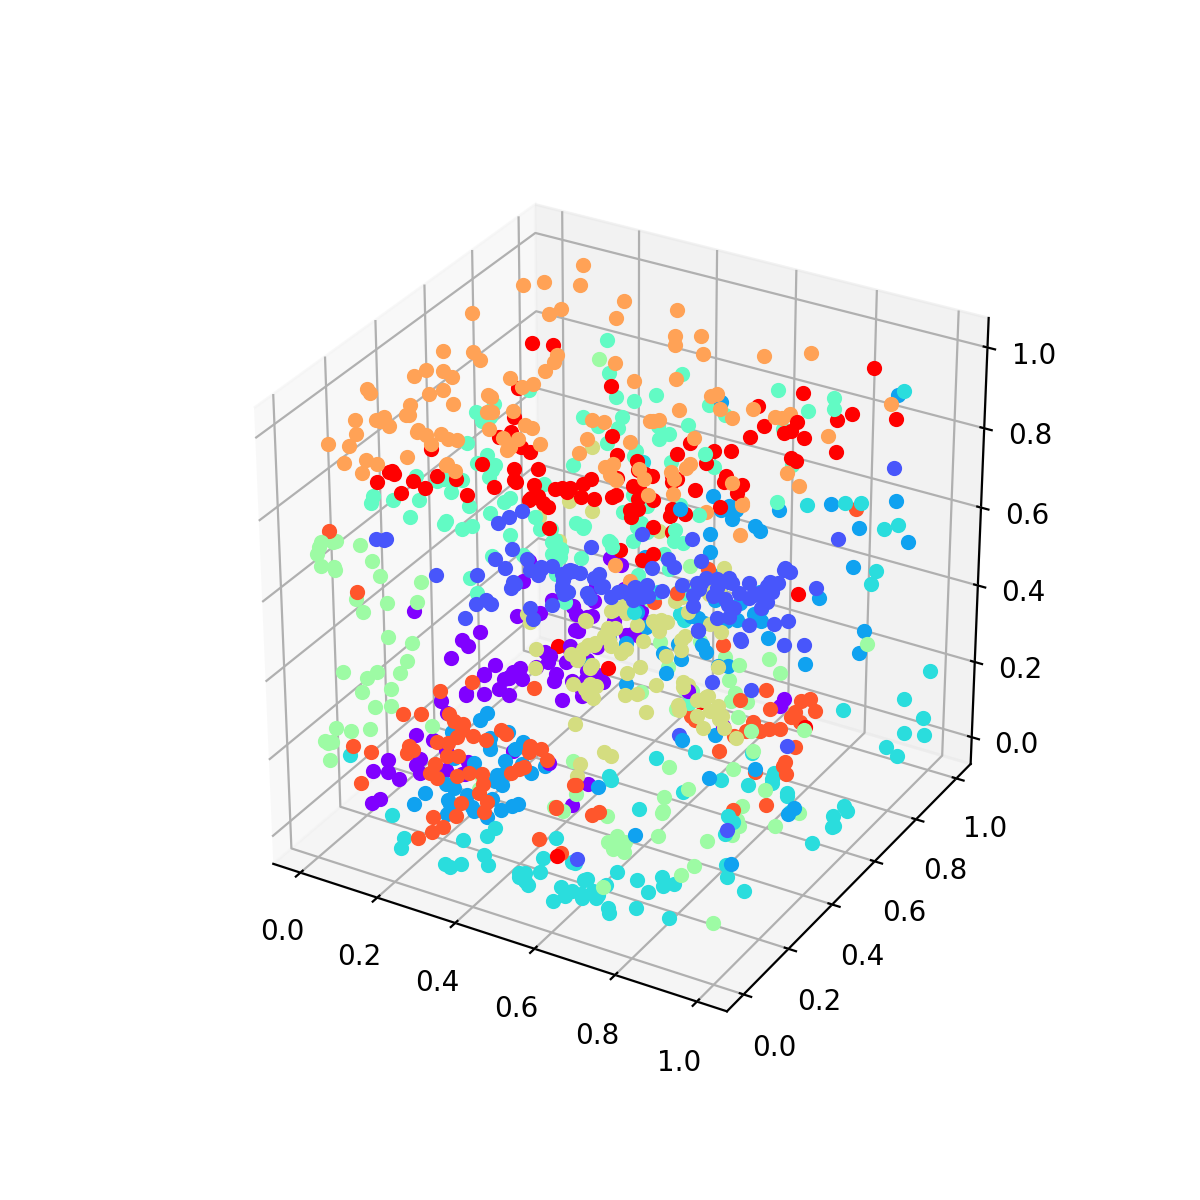

In [82]:
# (i)
activities = []
for t in train_in:
    net.FeedForward(t)
    activities.append(net.lyr[3].h)

activities = np.array(activities)
print(activities[0])
# the category, 0 for number 0, ..... 9 for number 9
color_label = np.array([list(np.where(i==1.)[0]) for i in train_class])
# randomly generate 10 color
colors = cm.rainbow(np.linspace(0, 1, 10))

points = np.hstack([activities,color_label])
# [x,y,z, cat] , cat = [0-9]
fig = plt.figure(4, figsize=(6,6))
fig.clf()
ax = plt.axes(projection='3d')
for point in points:
    ax.scatter3D(point[0], point[1], point[2],color = colors[int(point[3])])

In [78]:
# (ii)


In [ ]:
# (iii)


# Q2: BPTT Derivations

## (a) $\frac{\partial E}{\partial V}$

YOUR ANSWER HERE

## (b) $\frac{\partial E}{\partial U}$

YOUR ANSWER HERE

## (c) $\frac{\partial E}{\partial W}$

YOUR ANSWER HERE

## (d) $\frac{\partial E}{\partial b}$

YOUR ANSWER HERE

# Q3: RNN

## Read in the data

The code below creates two lists:
  - `sentences`, and
  - `next_chars`
  
Each list element represents a sequences of characters. There are 3 ways to represent a character:
1. As a string, eg. `'b'`
2. As an index to a character set, eg. `2`
3. As a one-hot vector, eg. `[0, 0, 1, 0, ...]`

The lists `sentences` and `next_chars` store the characters as indices. The utility functions
  - `char2vec`
  - `index2vec`
  - `vec2char`
  - `vec2index`
  
transform the characters between the 3 representations. You can also use the dictionaries `char_indices` and `indices_char` to convert between a string character and and index. The code below contains some examples.

In [ ]:
import re
text = open('origin_of_species.txt').read().lower()
chars = sorted(list(set(text)))
chars.insert(0, "\0") #Add newline character
vocab_size = len(chars)

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))
idx = [char_indices[c] for c in text]

# Let's simplify it by keeping only letters and spaces
filt_idx = []
for i in idx:
    if i<=24:
        filt_idx.append(2)
    elif i>24:
        filt_idx.append(i)
blah = ''.join([indices_char[f] for f in filt_idx])
text = re.sub(' +', ' ', blah)
chars = sorted(list(set(text)))
vocab_size = len(chars)
print('Character set: '+''.join(chars)+' (first char is a space)')

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))
idx = [char_indices[c] for c in text]

print('There are '+str(vocab_size)+' characters in our character set')

''.join(indices_char[i] for i in idx[:70])

def char2vec(c):
    v = np.zeros(vocab_size)
    v[char_indices[c]] = 1.
    return v

def index2vec(i):
    v = np.zeros(vocab_size)
    v[i] = 1.
    return v

def vec2index(v):
    i = np.argmax(v)
    return i

def vec2char(v):
    return indices_char[vec2index(v)]

'''Form the dataset in sentences'''
sentences_length = 10
sentences = []
next_chars = []
for i in range(0, 5000 - sentences_length + 1):
    sentences.append(idx[i: i + sentences_length]) #Assume a sentence is made of X characters
    next_chars.append(idx[i + 1: i + sentences_length + 1]) #Offset by 1 to the right for the target

sentences = np.concatenate([[np.array(o)] for o in sentences[:-2]])
next_chars = np.concatenate([[np.array(o)] for o in next_chars[:-2]])
sentences.shape, next_chars.shape

def read_sentence(vec):
    return ''.join(indices_char[i] for i in vec)

print('Here is how you can view one of the samples:')
print('Sample input: ['+read_sentence(sentences[0])+']')

## Some utility functions

In [ ]:
def sigma(z):
    return np.clip(z, a_min=0, a_max=None)  # ReLU
    #return 1./(1+np.exp(-z))  # use this for logistic

def sigma_primed(y):
    return np.clip(np.sign(y), a_min=0, a_max=1)  # Derivative of ReLU
    #return y*(1.-y)  # use this for logistic

def softmax(z):
    ez = np.exp(z)
    denom = np.sum(ez)
    return ez / denom

def CrossEntropy(y, t):  # should rename it to CategoricalCE
    return -sum(t*np.log(y))

## (a) Complete BPTT

In [ ]:
class RNN():
    
    def __init__(self, dims, seq_length=10):
        '''
         Input:
           dims is [X, H, Y], where the input has layer has X neurons, the
                hidden layer has H neurons, and the output layer has Y neurons.
           seq_length is how many steps to unroll the RNN through time
                (this is the same as tau in the lecture notes)
        '''
        self.X, self.H, self.Y = dims
        self.seq_length = seq_length
        # Input layer
        self.xs = [np.zeros(self.X) for x in range(seq_length)] # activity
        # Hidden layer
        self.hs = [np.zeros(self.H) for x in range(seq_length)] # activity
        # Output layer
        self.ys = [np.zeros(self.Y) for x in range(seq_length)] # activity
        
        # Connection weights
        self.U = np.random.normal(size=[self.H, self.X])/np.sqrt(self.X) # input->hidden
        self.W = np.random.normal(size=[self.H, self.H])/np.sqrt(self.H) # hidden->hidden
        self.V = np.random.normal(size=[self.Y, self.H])/np.sqrt(self.H) # hidden->output
        self.b = np.zeros(self.H) # biases for hidden nodes
        self.c = np.zeros(self.Y) # biases for output nodes
        
    def ForwardTT(self, seq_in):
        '''
         i = ForwardTT(seq_in)
        
         Propagates the RNN forward through time, saving all the intermediate
         states that will be needed for backprop through time (BPTT).
        
         Input:
           seq_in is a vector of indecies, with self.seq_length elements.
        
         Output:
           i is the index of the character predicted to follow the input.
         
         This method's main purpose is to update the states of the activites
         in the time-unrolled network.
        '''
        self.xs[0] = index2vec(seq_in[0]) # convert to character vector
        
        # Starting input current for hidden nodes
        ss = np.dot(self.U, self.xs[0]) + self.b
        self.hs[0] = sigma(ss)  # Activation of hidden nodes
        
        # Input current for output nodes
        zs = np.dot(self.V, self.hs[0]) + self.c
        self.ys[0] = softmax(zs)  # Activation of output nodes
        
        # Now process forward in time
        for i in range(1, self.seq_length):
            self.xs[i] = index2vec(seq_in[i])  # input vector
            
            # Input current for hidden nodes, including recurrent connections
            ss = np.dot(self.U, self.xs[i]) + np.dot(self.W, self.hs[i-1]) + self.b
            self.hs[i] = sigma(ss)  # Activation
            
            # Input current for output nodes
            zs = np.dot(self.V, self.hs[i]) + self.c
            self.ys[i] = softmax(zs)  # Activation
            
        # Might as well output the final state of the output
        return vec2index(self.ys[-1])
    
    def Generate(self, n=1):
        '''
         c = Generate(n=1)
         
         Runs the RNN from the last state after running ForwardTT, outputting
         the next n characters.
         
         Input:
           n is the number of characters you want to predict
           
         Output:
           c is a string of n characters
        '''
        y = self.ys[-1]  # Final output of ForwardTT
        c = vec2char(y)  # Convert it to a character string
        h = self.hs[-1]  # Starting with last hidden state...
        # Loop forward in time
        # (no need to record states, since we won't be doing BPTT)
        for nn in range(n-1):
            x = copy.copy(y)  # Use last output as next input
            
            # Input current for hidden nodes
            s = np.dot(self.U, x) + np.dot(self.W, h) + self.b
            h = sigma(s)  # Activation
            
            # Input current for output nodes
            z = np.dot(self.V, h) + self.c
            y = softmax(z)  # Activation
            
            # And add the next character to our output string
            c += vec2char(y)
            
        return c
            
    def BPTT(self, seq_in, seq_out):
        '''
         BPTT(seq_in, seq_out)
         
         Performs backprop through time on one sample given by the input and
         output sequence.
         
         Input:
           seq_in is a vector of indices specifying the input sequence of
                   characters.
           seq_out is a vector of indices specifying the output sequence of
                   characters. Typically, seq_out is the same as seq_in, but
                   shifted by 1 character.
         
         Output:
           None, but the connection weights and biases are updated.
        '''
        # Initialize gradients to zero
        self.dEdV = np.zeros(np.shape(self.V))
        self.dEdW = np.zeros(np.shape(self.W))
        self.dEdU = np.zeros(np.shape(self.U))
        self.dEdb = np.zeros(np.shape(self.b))
        self.dEdc = np.zeros(np.shape(self.c))
        
        # ===================
        # ===================
        # =  YOUR CODE HERE =
        # ===================
        # ===================


        
    def Evaluate(self, train_in, train_out):
        '''
         loss = Evaluate(train_in, train_out)
         
         Evaluates the network on the supplied dataset.
         
         Input:
           train_in is a list of input sequences (see ForwardTT for format of input)
           train_out is the corresponding list of output sequences
           
         Output:
           loss is the average cross entropy
        '''
        val = 0.
        for x, t in zip(train_in, train_out):
            self.ForwardTT(x)
            for i in range(self.seq_length):
                val += CrossEntropy(self.ys[i], index2vec(t[i]))
        return val/len(train_in)
 

    def Train(self, train_in, train_out, kappa=0.05, epochs=1):
        '''
         Train(train_in, train_out, kappa=0.05, epochs=1)
         
         Performs epochs of gradient descent, performing BPTT after each sample.
         
         Input:
           train_in and train_out is the training dataset
           kappa is the learning rate
           epochs is the number of times to go through the dataset
           
         Output:
           None, but the connection weights and biases are updated
        '''
        # Loop over epochs
        for e in range(epochs):
            
            # Shuffle the training data
            data_shuffled = list(zip(train_in, train_out))
            np.random.shuffle(data_shuffled)
            
            for x, t in data_shuffled:
                self.ForwardTT(x)  # Forward through time
                self.BPTT(x, t)    # Backprop through time
                # Note that BPTT starts by resetting the gradients to zero.
                
                # Apply update to connection weights and biases
                self.V -= kappa*self.dEdV
                self.U -= kappa*self.dEdU
                self.W -= kappa*self.dEdW
                self.b -= kappa*self.dEdb
                self.c -= kappa*self.dEdc

            print('Epoch '+str(e)+', Loss = '+str(self.Evaluate(train_in, train_out)))

## (b) Create the RNN

In [ ]:
# YOUR CODE HERE
#net = RNN(...)

## (c) Train

In [ ]:
# YOUR CODE HERE
# net.Train(...)

In [ ]:
# You might opt to have more than one train command, using different
# learning rates and numbers of epochs. Each one builds on the results
# from the last run.
#net.Train(...)

## (d) Evaluate

In [ ]:
n = 38
b.ForwardTT(sentences[n])
blah = read_sentence(sentences[n])
print('Input:      '+blah)
print('Prediction: '+blah+b.Generate(5))
print('Actual:     '+blah+read_sentence(sentences[n+10]))

In [ ]:
blah = 'harles dar'
blah = read_sentence(sentences[np.random.randint(len(sentences))])
x = [char_indices[c] for c in blah]
b.ForwardTT(x)
print(blah)
print(blah+b.Generate(10))

In [ ]:
# YOUR CODE HERE